In [4]:

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D

# our libraries
from utils import plot_svc_decision_function

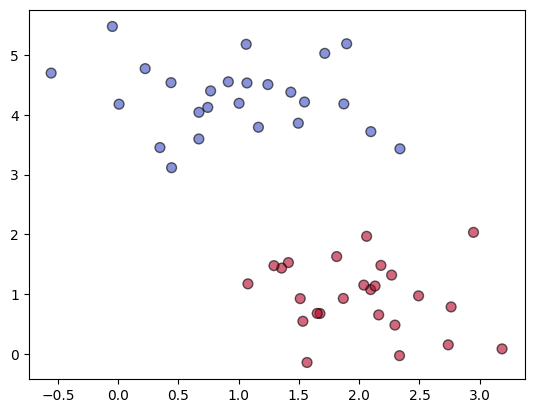

In [5]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap=plt.cm.coolwarm, alpha=0.6)
plt.show()

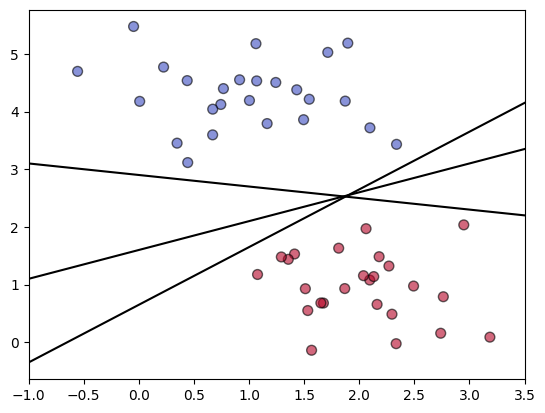

In [6]:
# plot data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)

# draw three different separators
x_values = np.linspace(-1, 3.5)
for w, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(x_values, w * x_values + b, '-k')

plt.xlim(-1, 3.5)
plt.show()

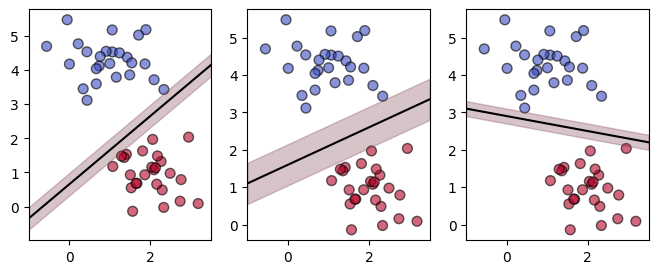

In [7]:
plt.figure(figsize=(8, 3))

# draw separators and margins
x_values = np.linspace(-1, 3.5)
for i, (w, b, m) in enumerate([(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]):
    plt.subplot(1, 3, i + 1)

    # draw data
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
    y_values = w * x_values + b

    # draw separator and margin
    plt.plot(x_values, y_values, '-k')
    plt.fill_between(x_values, y_values - m, y_values + m, edgecolor='none', color='#7D3C4A', alpha=0.3)
    plt.xlim(-1, 3.5)

plt.show()

In [8]:
from sklearn.svm import SVC

# create Support Vector Classifier using a linear kernel
clf = SVC(kernel='linear')

# train the classifier
clf.fit(X, y)

SVC(kernel='linear')

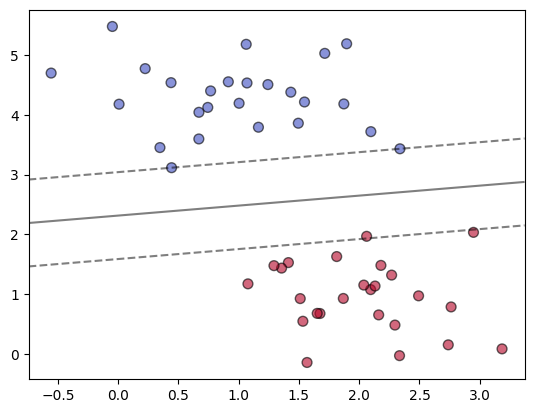

In [9]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plot_svc_decision_function(clf)
plt.show()

### Support Vectors

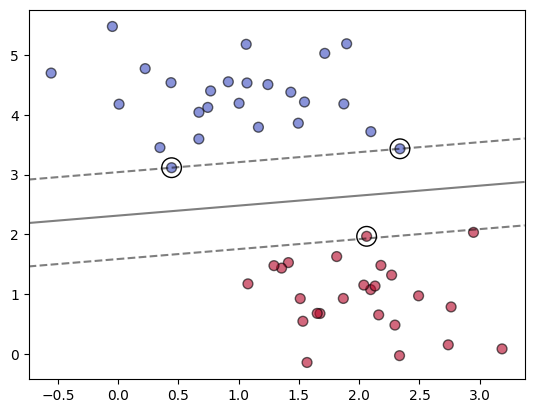

In [10]:
plt.figure()
# plot data and margin
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plot_svc_decision_function(clf)

# plot support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none');

In [39]:
fig, ax = plt.subplots(1)


def plot_svm(C=1):
    ax.clear()

    # create data and classify
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)


    clf = SVC(kernel='linear', gamma='scale', C=C/10)
    clf.fit(X, y)

    # show classification result
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none')
    plt.show()

#N = widgets.IntSlider(value=10, min=10, max=200, step=10, description='N:')
C = widgets.IntSlider(value=0.1, min=1, max=100, step=1, description='C:')
widgets.interact(plot_svm, C=C, kernel='linear');

interactive(children=(IntSlider(value=1, description='C:', min=1), Output()), _dom_classes=('widget-interact',…

In [24]:
fig, ax = plt.subplots(1)


def plot_svm(N=10):
    ax.clear()

    # create data and classify
    X, y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear', gamma='scale', C=1)
    clf.fit(X, y)

    # display classification results
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none')
    plt.show()

N = widgets.IntSlider(value=10, min=10, max=200, step=10, description='N:')
widgets.interact(plot_svm, N=N, kernel='linear');

interactive(children=(IntSlider(value=10, description='N:', max=200, min=10, step=10), Output()), _dom_classes…

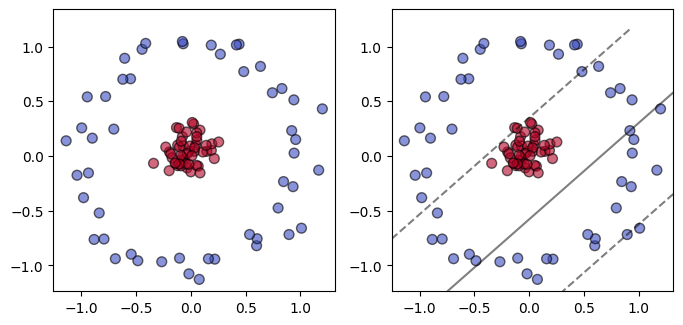

In [13]:
from sklearn.datasets import make_circles

# create dataset
X, y = make_circles(100, factor=.1, noise=.1, random_state=3)

# vreate and train classifier
clf = SVC(kernel='linear').fit(X, y)

# show classification results
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plt.axis('square')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plot_svc_decision_function(clf)
plt.axis('square');

**Kernel**: A functional transformation on input data.

$$r(x, 0) = e^{-(x_0^2 + x_1^2)}$$

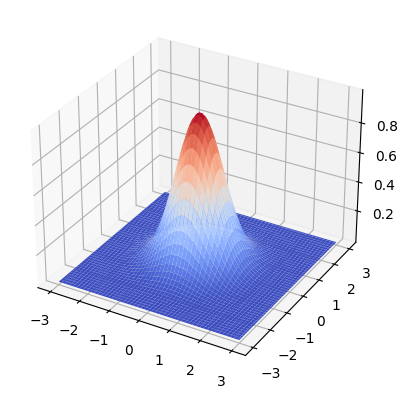

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
R = np.exp(-(X1 ** 2 + X2 ** 2))
ax.plot_surface(X1, X2, R, cmap=plt.cm.coolwarm)
plt.show()

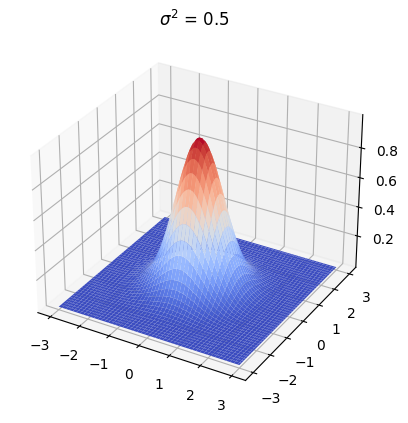

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)

sigma2 = 0.5
R1 = np.exp(-(X1 ** 2 + X2 ** 2) / (2 * sigma2))
surf = ax.plot_surface(X1, X2, R1, cmap=plt.cm.coolwarm)
plt.title('$\sigma^2$ = {:.1f}'.format(sigma2))
plt.show()

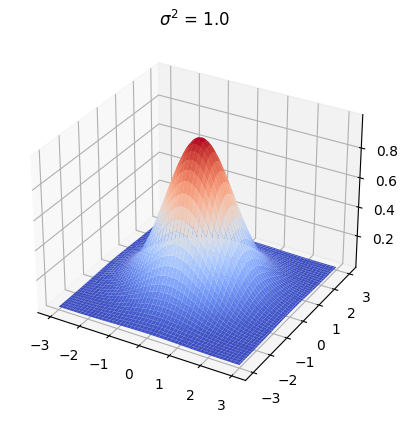

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)

sigma2 = 1.0
R1 = np.exp(-(X1 ** 2 + X2 ** 2) / (2 * sigma2))
surf = ax.plot_surface(X1, X2, R1, cmap=plt.cm.coolwarm)
plt.title('$\sigma^2$ = {:.1f}'.format(sigma2))
plt.show()

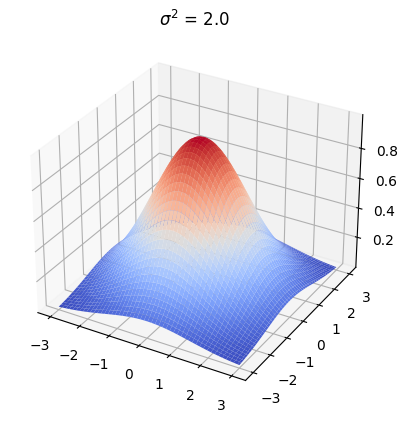

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)

sigma2 = 2.0
R1 = np.exp(-(X1 ** 2 + X2 ** 2) / (2 * sigma2))
surf = ax.plot_surface(X1, X2, R1, cmap=plt.cm.coolwarm)
plt.title('$\sigma^2$ = {:.1f}'.format(sigma2))
plt.show()

In [18]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='coolwarm')
ax.view_init(elev=30, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r')
plt.show()

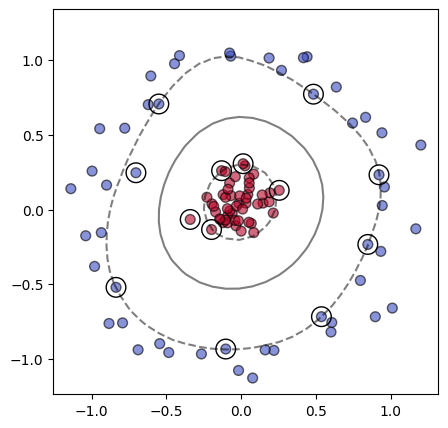

In [20]:
clf = SVC(kernel='rbf', gamma='scale')
clf.fit(X, y)

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='black', cmap='coolwarm', alpha=0.6)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=200, edgecolors='k', facecolors='none');
plt.axis('square')
plt.show()